# Today's Concepts
## Decision tree
##### It is a non linear classification algorithm 
##### it is a tree structured data and tehre are trwo types of entities 
    - 1. nodes
    - 2. leaves
- Decision Tree Classifier
    - it is a categorical data (yes or no type)
- Decision Tree Regressor
    - it is a continuous data like (1,2,3,4....)
##  Random forest Algorithm
##### itisa non linear classification anssame andit isbetterthan decision tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Kyphosis.csv")

In [3]:
df.shape

(81, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [9]:
x = df.drop("Kyphosis",axis = 1)

In [10]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [11]:
y = df["Kyphosis"]
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier()

In [16]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
pred = dtc.predict(x_test)

In [18]:
pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
accuracy_score(y_test,pred)

0.84

In [21]:
confusion_matrix(y_test,pred)

array([[21,  2],
       [ 2,  0]], dtype=int64)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        23
     present       0.00      0.00      0.00         2

    accuracy                           0.84        25
   macro avg       0.46      0.46      0.46        25
weighted avg       0.84      0.84      0.84        25



- Decisison Tree Reggrossor
- target - continuoes data

In [23]:
data = pd.read_csv("Icecreamdata.csv")

In [24]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [25]:
data.shape

(500, 2)

In [28]:
data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [29]:
x= data[['Temperature']]
y = data[['Revenue']]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
reg = DecisionTreeRegressor()

In [34]:
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
pred = reg.predict(x_test)

In [37]:
reg.score(x_test,pred)

1.0

In [39]:
#calculating the mean square error
from sklearn.metrics import mean_squared_error

In [42]:
import math

math.sqrt(mean_squared_error(x_test,pred))

496.2465326640492

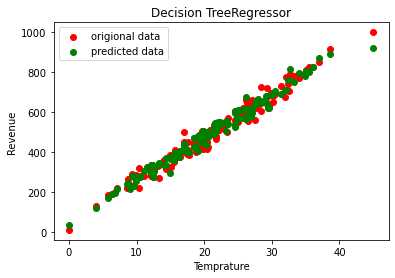

In [46]:
falg,ax = plt.subplots()
ax.scatter(x_test,y_test,color = 'r',label = "origional data")
ax.scatter(x_test,pred,color = 'g',label = "predicted data")
plt.title("Decision TreeRegressor")
plt.xlabel('Temprature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

- random forest for applying diabeties dataset


In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/diabetes.csv")

In [48]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:
#preprocessing\
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [55]:
x = data.drop("Outcome",axis = 1)

In [56]:
y = data['Outcome']

In [57]:
data.shape

(768, 9)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier()

In [71]:
rfc.fit(x_test,y_test)

RandomForestClassifier()

In [72]:
pred = rfc.predict(x_test)

In [73]:
accuracy_score(y_test,pred)

1.0

In [74]:
confusion_matrix(y_test,pred)

array([[154,   0],
       [  0,  77]], dtype=int64)

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00        77

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

